# SVM 연습문제 (핸즈온 Ch.5)

**2. 서포트 벡터가 무엇인가요?**

**답** : SVM이 훈련된 후 경계를 포함해 도로에 놓인 샘플, 결정 경계를 정하는 유일한 샘플

**3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?**

**답** : 스케일이 맞아야 모든 특성을 고려해 가장 큰 마진의 결정경계를 만들 수 있으므로 (스케일이 맞지 않으면 작은 특성들을 무시하는 경향이 있음)



**8. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.**

In [20]:
from sklearn import datasets
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
iris = datasets.load_iris()

In [22]:
# iris data를 로드하고 x,y를 지정해줍니다.
#(힌트: 핸즈온 머신러닝 교재 208쪽 참고)


X = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y==0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [23]:
C = 5 
alpha = 1 / (C * len(X))


In [24]:
# LinearSVC 학습하기

lin_svc = LinearSVC(loss='hinge',C=C,random_state=42)
svc = SVC(kernel='linear',C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0=0.001, tol=1e-3,alpha=alpha,
                       max_iter=100000, random_state=42)

# 위를 이용하여 데이터 스케일링 후 LinearSVC,SVC,SGDClassifier 구하기

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_svc.fit(X_scaled,y)
svc.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

print('LinearSVC :',lin_svc.intercept_,lin_svc.coef_)
print('SVC :',svc.intercept_,svc.coef_)
print('SGDClassifier :',sgd_clf.intercept_,sgd_clf.coef_)

LinearSVC : [0.28475098] [[1.05364854 1.09903804]]
SVC : [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier : [0.117] [[0.77714169 0.72981762]]


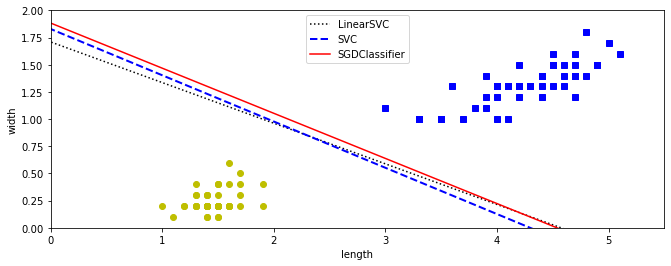

In [25]:
# 세 개 모델의 결정 경계를 그리기
# 먼저 결정 결제들의 기울기(W)와 편향(b)을 구함

w1 = -lin_svc.coef_[0,0] / lin_svc.coef_[0,1]
b1 = -lin_svc.intercept_[0] / lin_svc.coef_[0,1]
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 결계를 원본 스케일로 변환하기

line1 = scaler.inverse_transform([[-10,-10*w1+b1],[10,10*w1+b1]])
line2 = scaler.inverse_transform([[-10,-10*w2+b2],[10,10*w2+b2]])
line3 = scaler.inverse_transform([[-10,-10*w3+b3],[10,10*w3+b3]])

# 세 개의 결정 경계를 모두 그리기

plt.figure(figsize=(11,4))
plt.plot(line1[:,0], line1[:,1], "k:",label="LinearSVC")
plt.plot(line2[:,0],line2[:,1],"b--",linewidth=2,label="SVC")
plt.plot(line3[:,0],line3[:,1],'r-',label="SGDClassifier")

plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo')

plt.xlabel("length")
plt.ylabel("width")
plt.legend(loc='upper center')
plt.axis([0,5.5,0,2])
plt.show()

# 아주 비슷한 결정 경계를 보인다. 

In [26]:
# 너무 어려울 경우 https://leechamin.tistory.com/83 참고 